MultiLayer Peceptron weights on openml/554

Stochastic training algorithms
use of regularizers to overcome overftting.
iterations upto 10 with variant hidden layer sizes

MLPClassifier trained on the openml/554 dataset.
detailed results to detect/impute missing values



In [2]:
import warnings

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)
datt=fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)
# X, y= load_breast_cancer()
# "mnist_784", return_X_y=True, as_frame=False")
X = X / 255.0

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,90),
    max_iter=9,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

In [7]:
# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.49376551
Iteration 2, loss = 0.17228495
Iteration 3, loss = 0.13039587
Iteration 4, loss = 0.10188069
Iteration 5, loss = 0.08603965
Iteration 6, loss = 0.07587881
Iteration 7, loss = 0.06666207
Iteration 8, loss = 0.05997569
Iteration 9, loss = 0.05465111
Training set score: 0.988524
Test set score: 0.957245


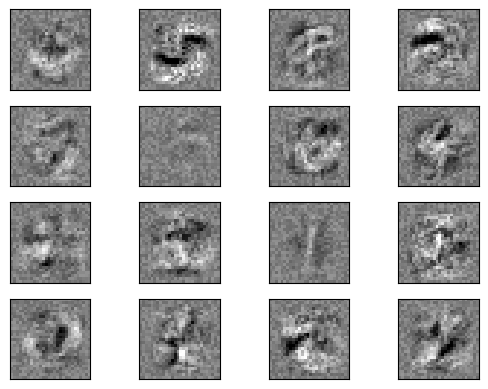

In [12]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[1].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
  coef = coef.reshape(28, 28)
    # ax.matshow(coef, cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
  ax.matshow(coef, cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
  ax.set_xticks(())
  ax.set_yticks(())

Accuracy of MLP: 0.9572448979591837
Precision of MLP: 0.9575966330898933
Recall of MLP: 0.9572448979591837
F1-score of MLP: 0.9571907520883862
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4911
           1       0.96      0.99      0.98      5544
           2       0.95      0.97      0.96      4896
           3       0.97      0.93      0.95      4986
           4       0.97      0.95      0.96      4768
           5       0.92      0.96      0.94      4384
           6       0.98      0.97      0.97      4780
           7       0.97      0.95      0.96      5072
           8       0.96      0.91      0.94      4757
           9       0.93      0.95      0.94      4902

    accuracy                           0.96     49000
   macro avg       0.96      0.96      0.96     49000
weighted avg       0.96      0.96      0.96     49000



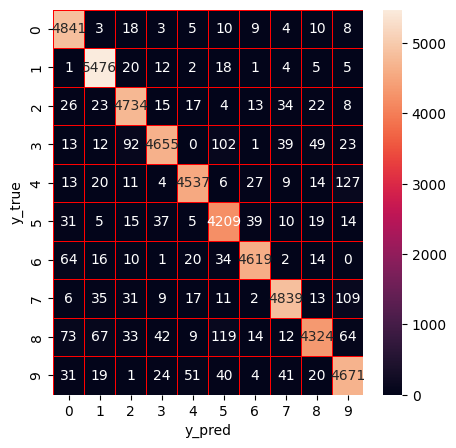

In [13]:
plt.show()
mlp_score=mlp.score(X_test, y_test)
y_predict=mlp.predict(X_test)
y_true=y_test
print('Accuracy of MLP: '+ str(mlp_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of MLP: '+(str(precision)))
print('Recall of MLP: '+(str(recall)))
print('F1-score of MLP: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()